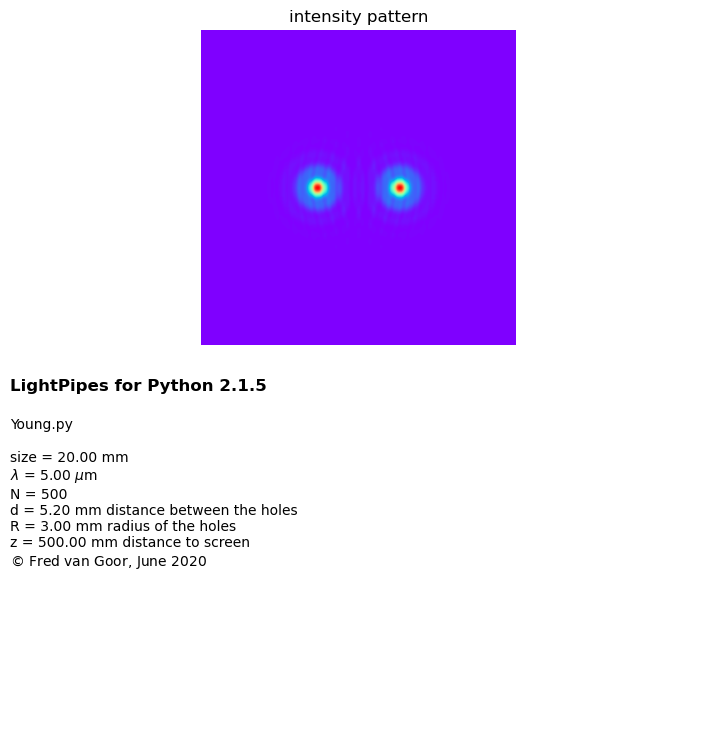

In [8]:
from LightPipes import *
import matplotlib.pyplot as plt
"""
    Young's experiment.
    Two holes with radii, R, separated by, d, in a screen are illuminated by a plane wave. The interference pattern
    at a distance, z, behind the screen is calculated.
"""
wavelength=5*um
size=20.0*mm
N=500
z=50*cm
R=3*mm
d=5.2*mm

F=Begin(size,wavelength,N)
F1=CircAperture(R/2.0,-d/2.0, 0, F)
F2=CircAperture(R/2.0, d/2.0, 0, F)
F=BeamMix(F1,F2)
F=Fresnel(z,F)
I=Intensity(2,F)

s1 =    r'LightPipes for Python ' + LPversion + '\n'
s2 =    r'Young.py'+ '\n\n'\
        f'size = {size/mm:4.2f} mm' + '\n'\
        f'$\\lambda$ = {wavelength/um:4.2f} $\\mu$m' + '\n'\
        f'N = {N:d}' + '\n'\
        f'd = {d/mm:4.2f} mm distance between the holes' + '\n'\
        f'R = {R/mm:4.2f} mm radius of the holes' + '\n'\
        f'z = {z/mm:4.2f} mm distance to screen' + '\n'\
        r'${\copyright}$ Fred van Goor, June 2020'

fig=plt.figure(figsize=(9,9));
ax1 = fig.add_subplot(211);ax1.axis('off')
ax2 = fig.add_subplot(212);ax2.axis('off')

ax1.imshow(I,cmap='rainbow');ax1.set_title('intensity pattern')


ax2.text(0.0,1.0,s1,fontsize=12, fontweight='bold')
ax2.text(0.0,0.5,s2)

plt.show()

In [2]:
import numpy as np

# Parameters for partial coherence
phase_shift = np.pi / 4  # Adjust this value to simulate different degrees of coherence

F1 = CircAperture(R/2.0, -d/2.0, 0, F)
F2 = CircAperture(R/2.0, d/2.0, 0, F)
F1 = Fresnel(z, F1)
F2 = Fresnel(z, F2)

# Introduce phase difference by modifying the field
F2.field *= np.exp(1j * phase_shift)  # Apply phase shift

F = BeamMix(F1, F2)
I = Intensity(2, F)


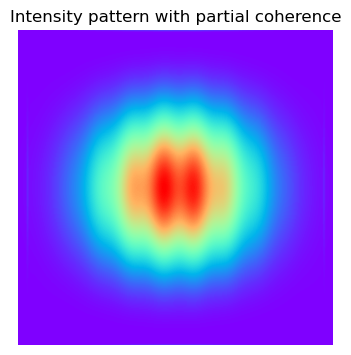

In [3]:
import numpy as np
from LightPipes import *

# Parameters for partial coherence
num_realizations = 100  # Number of realizations for averaging
intensity_sum = np.zeros((N, N))

for _ in range(num_realizations):
    phase_shift = np.random.uniform(0, 2 * np.pi)  # Random phase shift
    
    F1 = CircAperture(R/2.0, -d/2.0, 0, F)
    F2 = CircAperture(R/2.0, d/2.0, 0, F)
    F1 = Fresnel(z, F1)
    F2 = Fresnel(z, F2)

    # Apply the phase shift directly to the field
    F2.field *= np.exp(1j * phase_shift)
    
    F = BeamMix(F1, F2)
    intensity_sum += Intensity(2, F)

# Averaging over realizations
I_coherence = intensity_sum / num_realizations

# Plotting the results
fig = plt.figure(figsize=(9, 9))
ax1 = fig.add_subplot(211)
ax1.axis('off')
ax1.imshow(I_coherence, cmap='rainbow')
ax1.set_title('Intensity pattern with partial coherence')

plt.show()
